In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
import string
warnings.filterwarnings('ignore')

Load Data

In [39]:
df = pd.read_csv(r'C:\Users\Althaf\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project/train.csv')
df_sub = pd.read_csv(r'C:\Users\Althaf\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project/test.csv')
submission = pd.DataFrame()
submission['id'] = df_sub.id.copy()

In [40]:
def null_percentage(column):
    df_name = column.name
    nans = np.count_nonzero(column.isnull().values)
    total = column.size
    frac = nans / total
    perc = int(frac * 100)
    print('%d%% or %d missing from %s column.' % 
          (perc, nans, df_name))

def check_null(df, columns):
    for col in columns:
        null_percentage(df[col])
        
check_null(df, df.columns)

0% or 0 missing from id column.
0% or 0 missing from comment_text column.
0% or 0 missing from malignant column.
0% or 0 missing from highly_malignant column.
0% or 0 missing from rude column.
0% or 0 missing from threat column.
0% or 0 missing from abuse column.
0% or 0 missing from loathe column.


In [41]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

EDA

In [42]:
print('%d features and %d records.' % (df.shape[1], df.shape[0]))
print()
targets = list(df.columns[2:])
print('Target columns: ' + ', '.join(targets))

8 features and 159571 records.

Target columns: malignant, highly_malignant, rude, threat, abuse, loathe


In [43]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


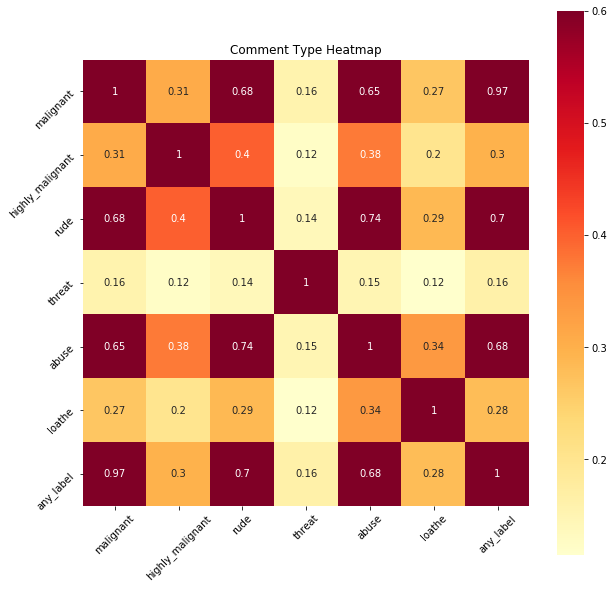

Training Data Comment Breakdown
=====

16225 out of 159571 comments, or 10.17%, are classified as toxic.

15294 malignant comments. (9.58% of all data.)
- 1595 or 10.43% were also highly_malignant.
- 7926 or 51.82% were also rude.
- 449 or 2.94% were also threat.
- 7344 or 48.02% were also abuse.
- 1302 or 8.51% were also loathe.
- 15294 or 100.00% were also any_label.

1595 highly_malignant comments. (1.00% of all data.)
- 1595 or 100.00% were also malignant.
- 1517 or 95.11% were also rude.
- 112 or 7.02% were also threat.
- 1371 or 85.96% were also abuse.
- 313 or 19.62% were also loathe.
- 1595 or 100.00% were also any_label.

8449 rude comments. (5.29% of all data.)
- 7926 or 93.81% were also malignant.
- 1517 or 17.95% were also highly_malignant.
- 301 or 3.56% were also threat.
- 6155 or 72.85% were also abuse.
- 1032 or 12.21% were also loathe.
- 8449 or 100.00% were also any_label.

478 threat comments. (0.30% of all data.)
- 449 or 93.93% were also malignant.
- 112 or 23.43% 

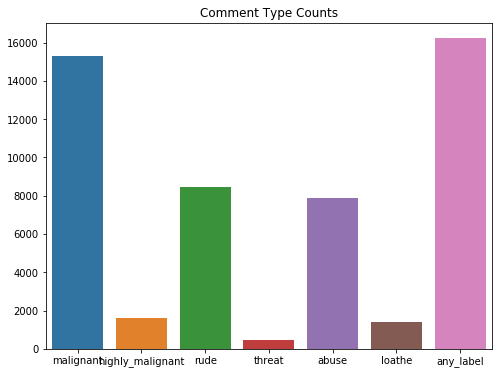

In [44]:
targets = list(df.columns[2:])
df_targets = df[targets].copy()

# How many rows are toxic? 
toxic_rows = df_targets.sum(axis=1)
toxic_rows = (toxic_rows > 0)

# Create overall any_label feature
targets.append('any_label')
df_targets['any_label'] = toxic_rows

count_dic = {}
for comment_type in targets:
    counts = list()
    others = list(targets)
    df_selection = df_targets[(df_targets[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[comment_type] = counts


del(df_selection)

def heatmap(df, title):
    plt.figure('heatmap', figsize=[10,10])
    plt.title(title)
    df_corr = df.corr()
    #df_corr = np.triu(df_corr, k=1)
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()

heatmap(df_targets, 'Comment Type Heatmap')


print('Training Data Comment Breakdown')
print('=====\n')

print('%d out of %d comments, or %.2f%%, are classified as toxic.' % 
     (np.sum(toxic_rows), len(df), (np.sum(toxic_rows)/len(df))*100))

totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
    print('\n%d %s comments. (%.2f%% of all data.)' % (value[0][1], key, (value[0][1]/len(df))*100))
    for cnt in value[1:]:
        print('- %d or %.2f%% were also %s.' % (cnt[1], (cnt[1]/value[0][1])*100, cnt[0]))
    

plt.figure('Comment Type Counts', figsize=[8,6])
plt.title('Comment Type Counts')
sns.barplot(x=list(count_dic.keys()), y=totals)
plt.show()

In [45]:
for t in targets:
    print("Label: %s ============================================================" % t)
    b = np.where(df_targets[t]==1)[0]
    selection = np.random.choice(b, 10)
    for s in selection:
        print(df.comment_text.loc[s])
        print("++++++++++++")
    print()
    
b = np.where(df_targets.any_label==0)[0]
selection = np.random.choice(b, 10)
print("Clean comments =========================================")
for s in selection:
    print(df.comment_text.loc[s])
    print("++++++++++++")

Label: malignant ============================================================
Considering I spell properly and you're just a racist... go soak your head. OR do some real research rather than being a censor monger.
++++++++++++
pleasure stop edit 

I hate you!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
++++++++++++
In my opinion 

Finland sucks. 62.216.118.84
++++++++++++
By the way you and everyone else like you are an absolute disgrace. You're hypocrits and are barriers to freedom of expression - why does wikipedia bother to blackout in protest to PIPA and SOPA when it doesn't allow information on its website anyway. As for you shimgray you're sad, pathetic and spineless; you take satisfaction from deleting other articles and generally feeling self important, as a result. You will clearly never be of any importance or notability thus you feel it is your right to try and be so via your menial control over an electronic encyclopedia. 
Rot in hell. I wish you a slow, painful death

In [46]:
df['length'] = df.comment_text.apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(df[(df_targets.any_label==1)].length)))
print("Average clean comment length: %d" % int(np.mean(df[(df_targets.any_label==0)].length)))

Average toxic comment length: 303
Average clean comment length: 404


In [47]:
print("Median toxic comment length: %d" % int(np.median(df[(df_targets.any_label==1)].length)))
print("Median clean comment length: %d" % int(np.median(df[(df_targets.any_label==0)].length)))

Median toxic comment length: 128
Median clean comment length: 216


In [48]:
def pct_caps(s):
    return sum([1 for c in s if c.isupper()]) / (sum(([1 for c in s if c.isalpha()])) + 1)
df['caps'] = df.comment_text.apply(lambda x: pct_caps(x))
print("Percent of capitalized characters in toxic comments: %d%%" % int(100 * np.mean(df[(df_targets.any_label==1)].caps)))
print("Percent of capitalized characters in clean comments: %d%%" % int(100 * np.mean(df[(df_targets.any_label==0)].caps)))

Percent of capitalized characters in toxic comments: 14%
Percent of capitalized characters in clean comments: 5%


In [49]:
def word_length(s):
    s = s.split(' ')
    return np.mean([len(w) for w in s if w.isalpha()])
df['word_length'] = df.comment_text.apply(lambda x: word_length(x))

print("Average word length in toxic comments: %.1f" % np.mean(df[(df_targets.any_label==1)].word_length))
print("Average word length in clean comments: %.1f" % np.mean(df[(df_targets.any_label==0)].word_length))

Average word length in toxic comments: 4.1
Average word length in clean comments: 4.4


In [50]:
df['exclamation'] = df.comment_text.apply(lambda s: len([c for c in s if c == '!']))
print("Exclamations in toxic comments: %.1f" % np.mean(df[(df_targets.any_label==1)].exclamation))
print("Exclamations in clean comments: %.1f" % np.mean(df[(df_targets.any_label==0)].exclamation))

Exclamations in toxic comments: 3.5
Exclamations in clean comments: 0.3


In [51]:
df['question'] = df.comment_text.apply(lambda s: len([c for c in s if c == '?']))
print("Question marks in toxic comments: %.1f" % np.mean(df[(df_targets.any_label==1)].question))
print("Question marks in clean comments: %.1f" % np.mean(df[(df_targets.any_label==0)].question))

Question marks in toxic comments: 0.6
Question marks in clean comments: 0.4


In [52]:
import re
ip = re.compile('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}'
                +'(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))')
def strip_ip(s, ip):
    try:
        found = ip.search(s)
        return s.replace(found.group(), ' ')
    except:
        return s
    
df.comment_text = df.comment_text.apply(lambda x: strip_ip(x, ip))

Label overlap summary.
1 label: 39.2%
2 labels: 21.4%
3 labels: 25.9%
4 labels: 10.8%
5 labels: 2.4%
6 labels: 0.2%


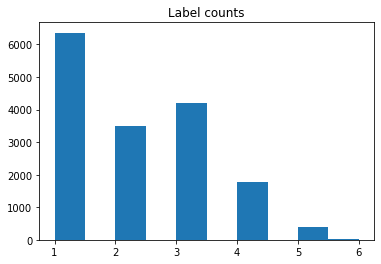

In [53]:
target_sums = np.sum(df_targets[df_targets.columns[:-1]], axis=1)
target_sums = target_sums[(df_targets.any_label==1)]
plt.figure('Label counts')
plt.title('Label counts')
plt.hist(target_sums)
print("Label overlap summary.")
for i in range(1,7):
    print('%d label%s: %.1f%%' % (i, 's' if i > 1 else '', 100 * len([s for s in target_sums if s == i])/len(target_sums)))

Split Labels from Training Data

In [54]:
print('Training labels:')
print(list(df_targets.columns))
print(df_targets.shape)

print('\nTraining data')
df.drop(list(df_targets.columns[:-1]), inplace=True, axis=1)
df.drop('id', inplace=True, axis=1)
print(list(df.columns))
print(df.shape)

Training labels:
['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'any_label']
(159571, 7)

Training data
['comment_text', 'length', 'caps', 'word_length', 'exclamation', 'question']
(159571, 6)


In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
test= pd.read_csv(r'C:\Users\Althaf\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project/test.csv', encoding='latin-1')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [57]:
train = pd.read_csv (r'C:\Users\Althaf\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project/train.csv', encoding='latin-1')
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [58]:
print ('Shape = >',train.shape)

Shape = > (159571, 8)


In [59]:
print ('0 and 1 counts','\n',train.malignant.value_counts())
print ('0 and 1 counts','\n',train.highly_malignant.value_counts())
print ('0 and 1 counts','\n',train.rude.value_counts())
print ('0 and 1 counts','\n',train.threat.value_counts())
print ('0 and 1 counts','\n',train.abuse.value_counts())
print ('0 and 1 counts','\n',train.loathe.value_counts())

0 and 1 counts 
 0    144277
1     15294
Name: malignant, dtype: int64
0 and 1 counts 
 0    157976
1      1595
Name: highly_malignant, dtype: int64
0 and 1 counts 
 0    151122
1      8449
Name: rude, dtype: int64
0 and 1 counts 
 0    159093
1       478
Name: threat, dtype: int64
0 and 1 counts 
 0    151694
1      7877
Name: abuse, dtype: int64
0 and 1 counts 
 0    158166
1      1405
Name: loathe, dtype: int64


In [60]:
train['length'] = train.comment_text.str.len()
train.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [61]:
train['comment_text'] = train['comment_text'].str.lower()

In [62]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [63]:

train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [64]:
train['comment_text'] = train['comment_text'].str.replace(r'[^\w\d\s]', ' ')


train['comment_text'] = train['comment_text'].str.replace(r'\s+', ' ')


train['comment_text'] = train['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [65]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [66]:
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [67]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,93
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


In [68]:
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62995074
Clean Length 40636416


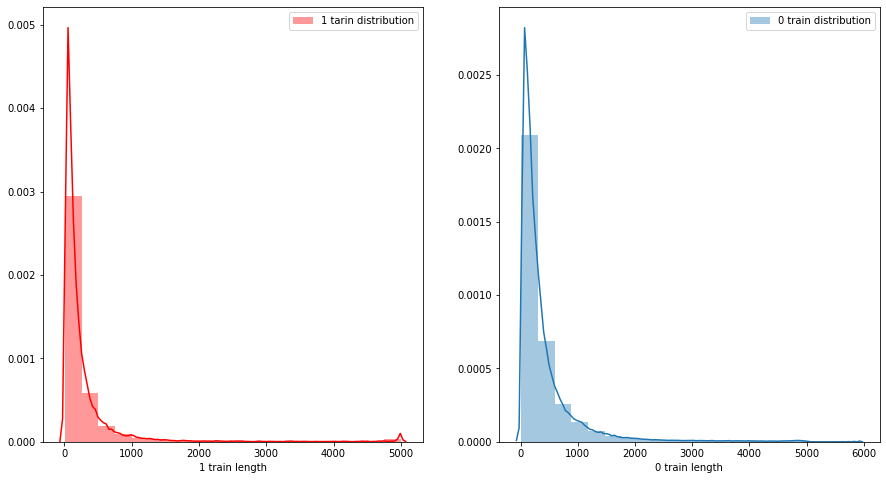

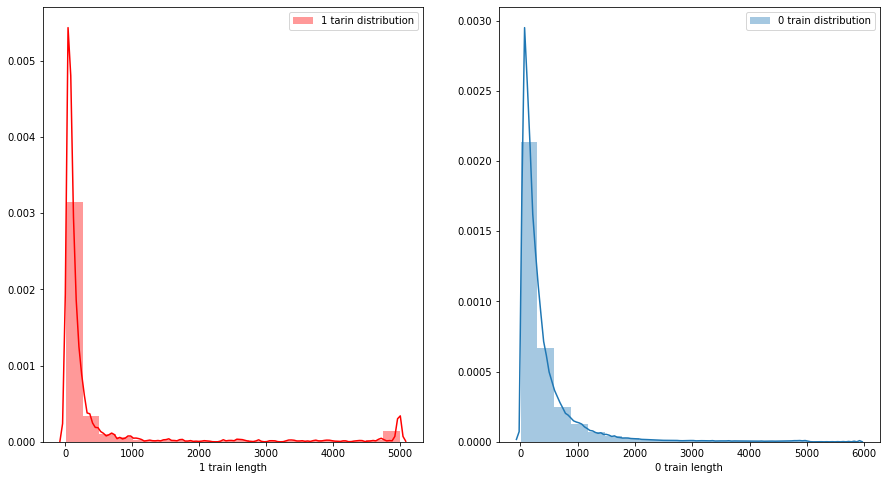

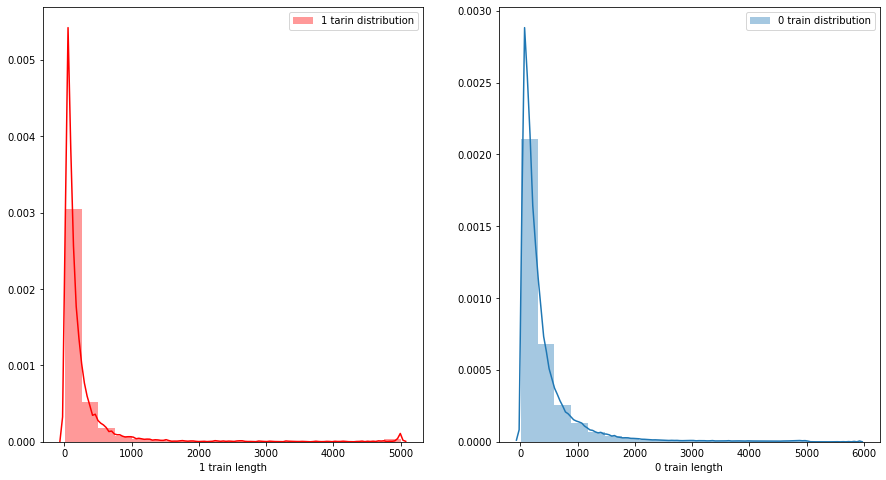

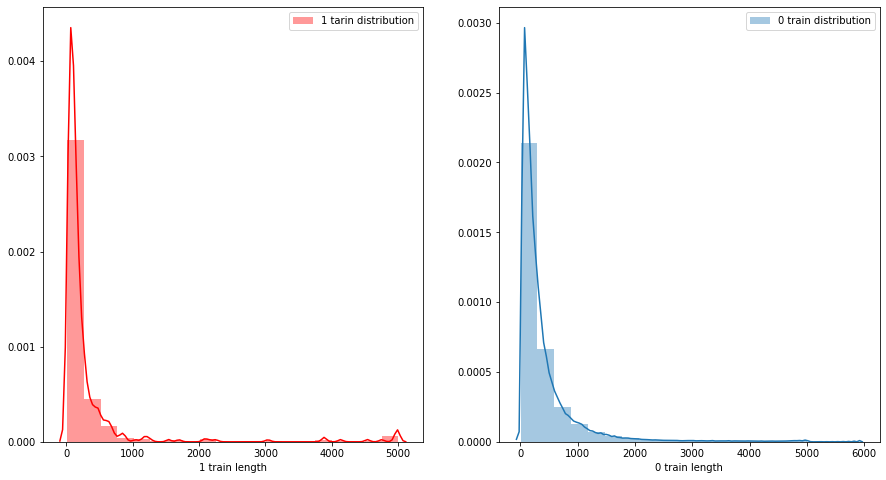

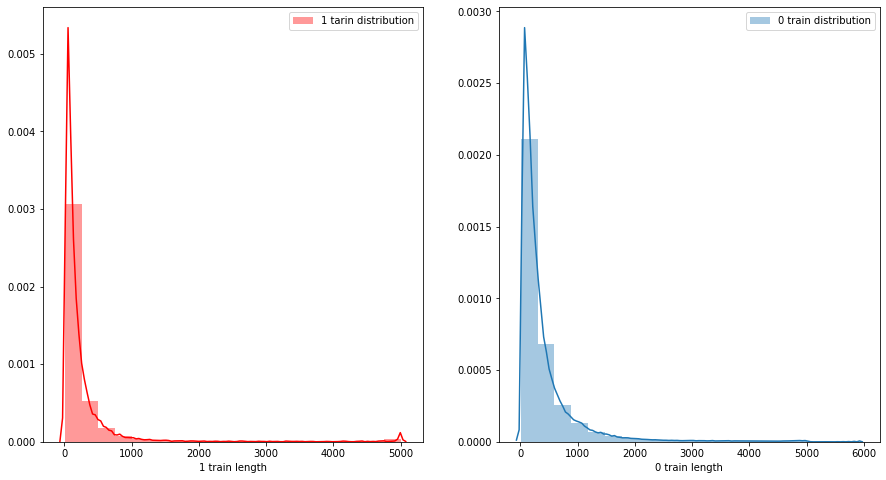

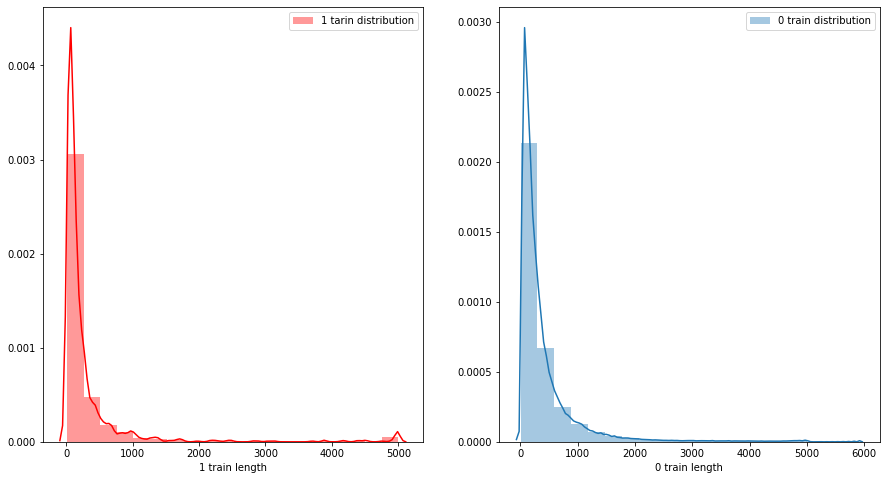

In [69]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['malignant']==1]['length'],bins=20,ax=ax[0],label='1 tarin distribution',color='r')

ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['malignant']==0]['length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()


f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['highly_malignant']==1]['length'],bins=20,ax=ax[0],label='1 tarin distribution',color='r')

ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['highly_malignant']==0]['length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['rude']==1]['length'],bins=20,ax=ax[0],label='1 tarin distribution',color='r')

ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['rude']==0]['length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['threat']==1]['length'],bins=20,ax=ax[0],label='1 tarin distribution',color='r')

ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['threat']==0]['length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['abuse']==1]['length'],bins=20,ax=ax[0],label='1 tarin distribution',color='r')

ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['abuse']==0]['length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['loathe']==1]['length'],bins=20,ax=ax[0],label='1 tarin distribution',color='r')

ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['loathe']==0]['length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()



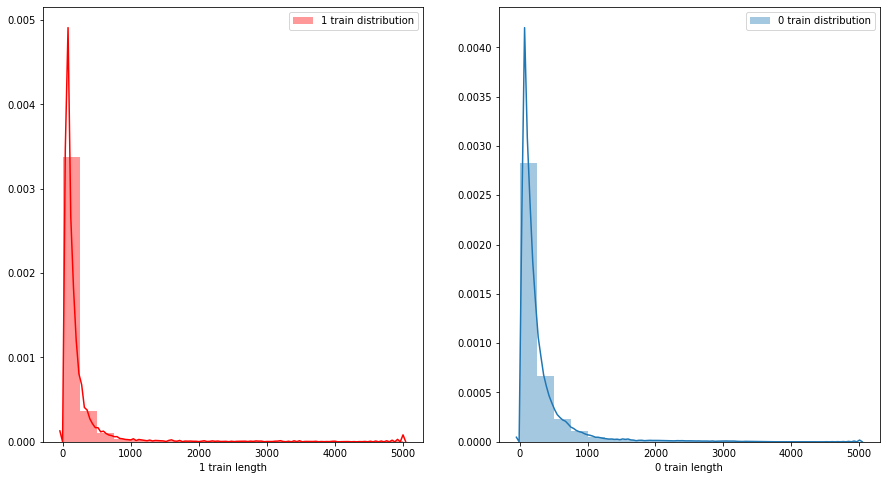

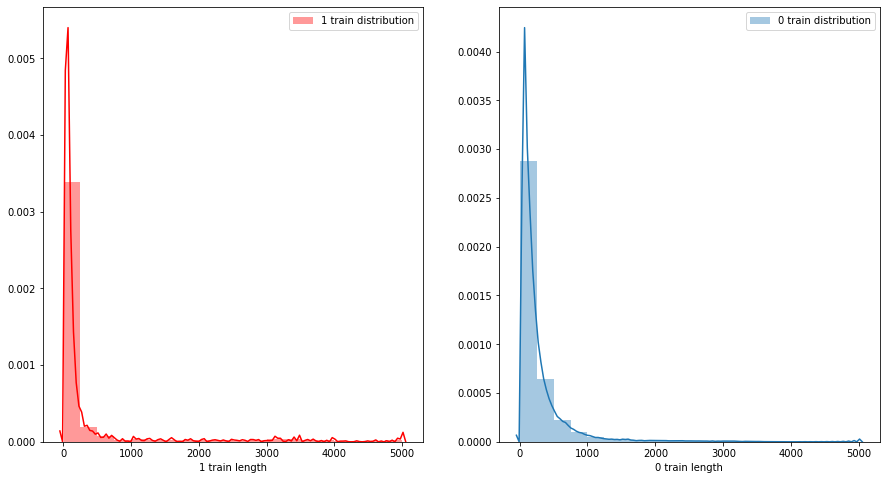

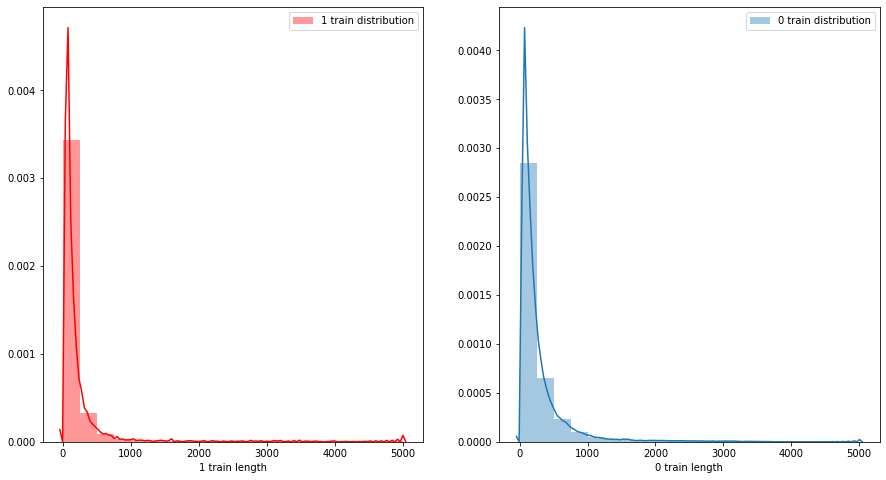

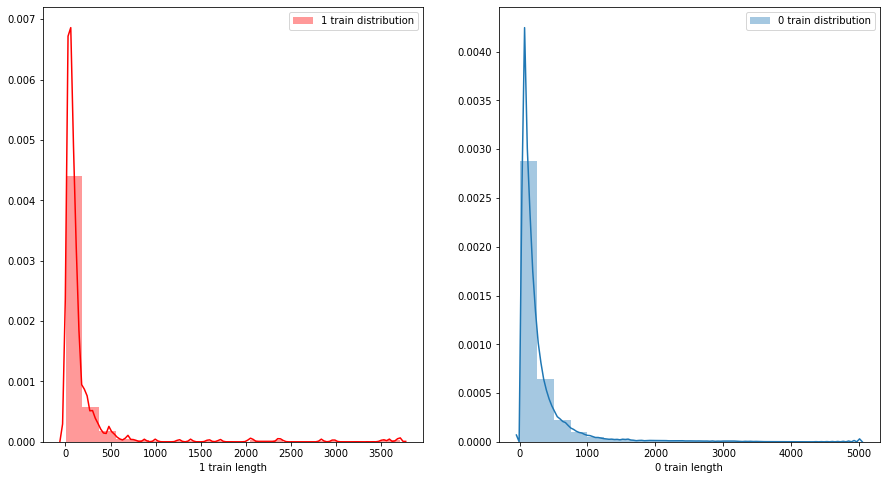

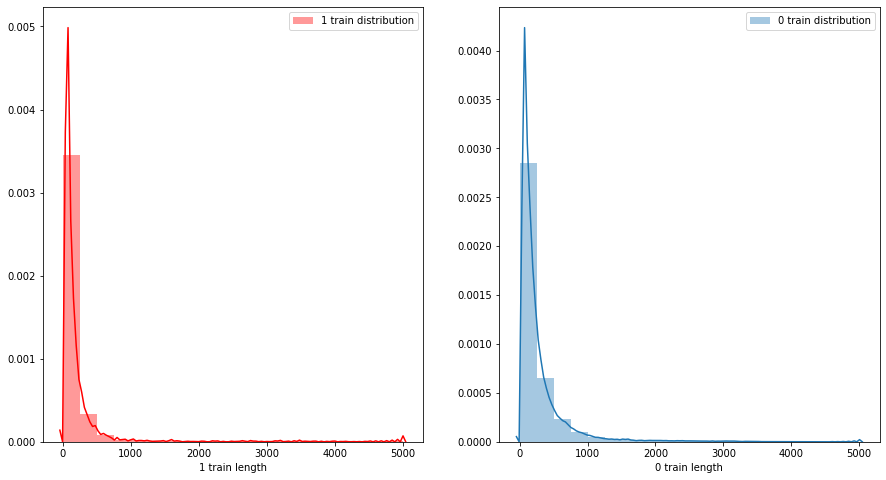

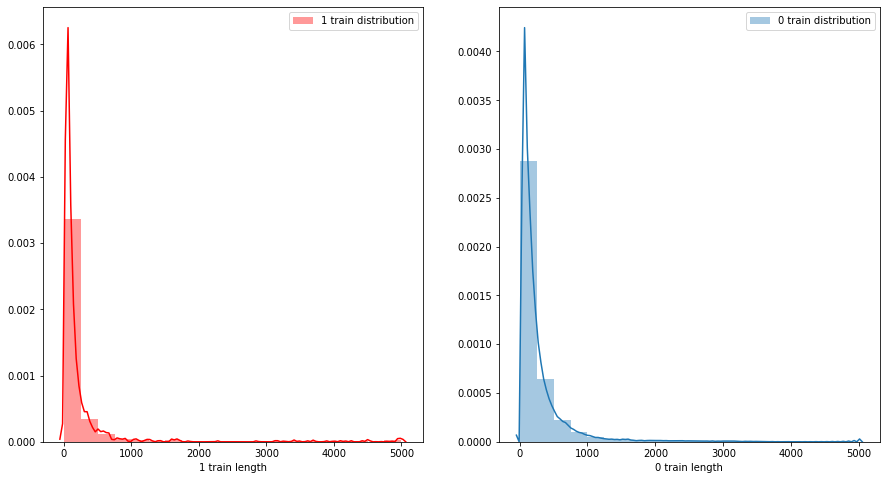

In [70]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='1 train distribution',color='r')
ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['highly_malignant']==1]['clean_length'],bins=20,ax=ax[0],label='1 train distribution',color='r')
ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['highly_malignant']==0]['clean_length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['rude']==1]['clean_length'],bins=20,ax=ax[0],label='1 train distribution',color='r')
ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['rude']==0]['clean_length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['threat']==1]['clean_length'],bins=20,ax=ax[0],label='1 train distribution',color='r')
ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['threat']==0]['clean_length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['abuse']==1]['clean_length'],bins=20,ax=ax[0],label='1 train distribution',color='r')
ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['abuse']==0]['clean_length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['loathe']==1]['clean_length'],bins=20,ax=ax[0],label='1 train distribution',color='r')
ax[0].set_xlabel('1 train length')
ax[0].legend()

sns.distplot(train[train['loathe']==0]['clean_length'],bins=20,ax=ax[1],label='0 train distribution')
ax[1].set_xlabel('0 train length')
ax[1].legend()

plt.show()

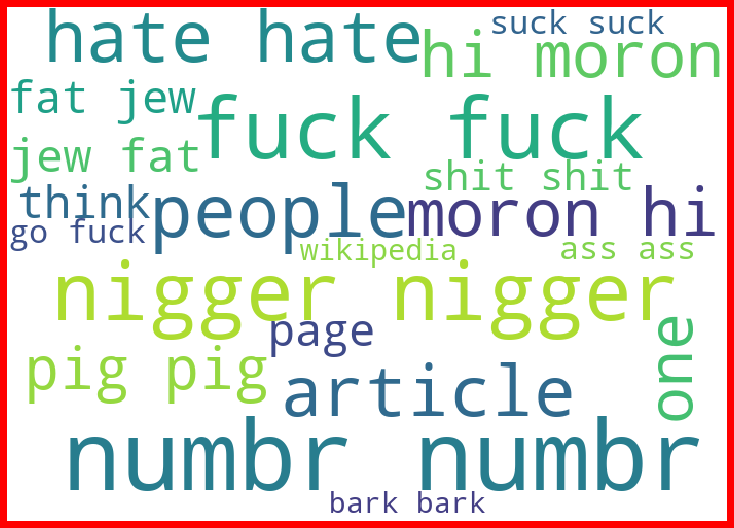

In [86]:
from wordcloud import WordCloud


comments = train['comment_text'][train['malignant']==1]

comment_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(comments))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


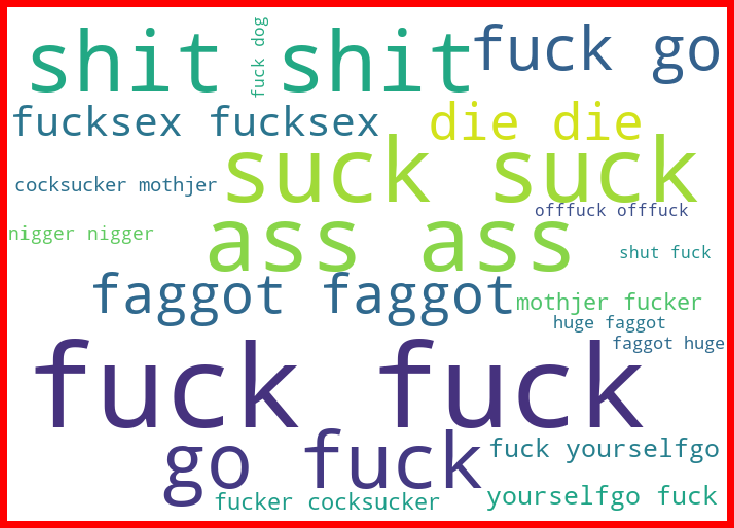

In [87]:
from wordcloud import WordCloud


comments = train['comment_text'][train['highly_malignant']==1]

comment_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(comments))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



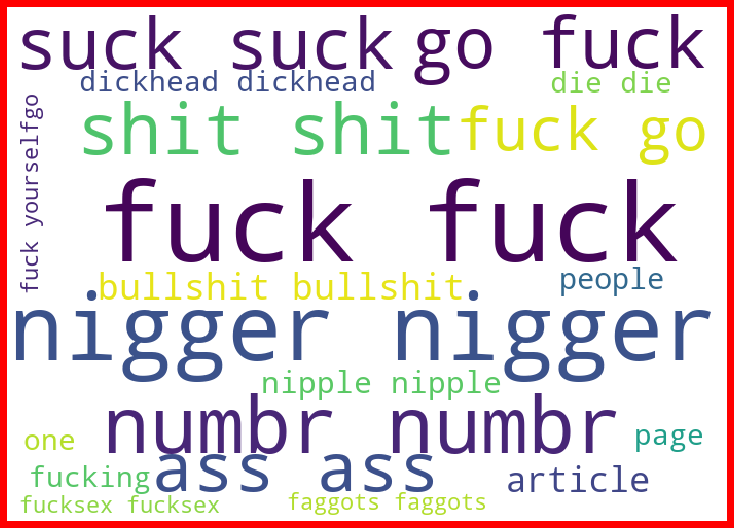

In [89]:
from wordcloud import WordCloud


comments = train['comment_text'][train['rude']==1]

comment_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(comments))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



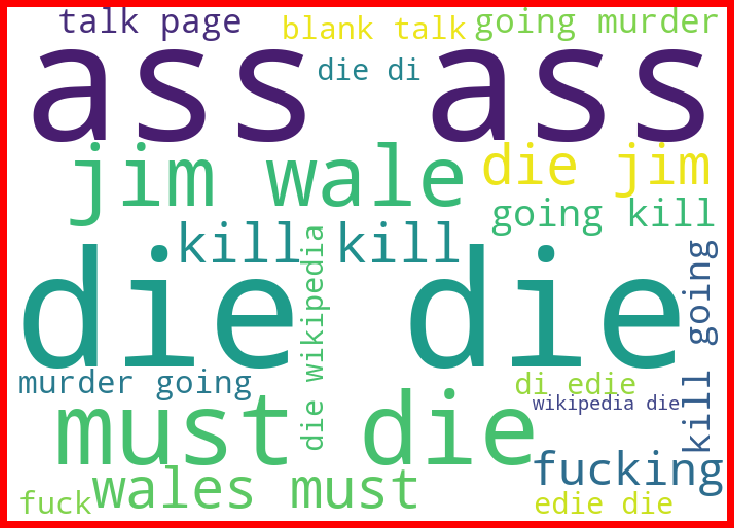

In [90]:
from wordcloud import WordCloud


comments = train['comment_text'][train['threat']==1]

comment_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(comments))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

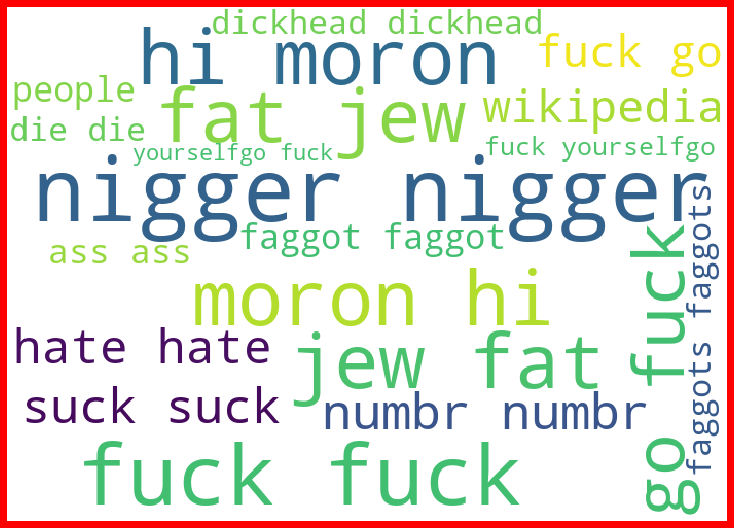

In [91]:
from wordcloud import WordCloud


comments = train['comment_text'][train['abuse']==1]

comment_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(comments ))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

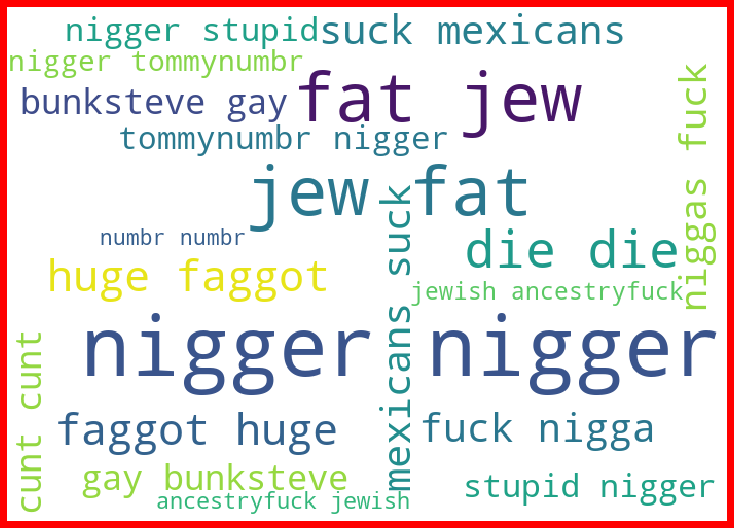

In [92]:
from wordcloud import WordCloud


comments = train['comment_text'][train['loathe']==1]

comment_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(comments))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

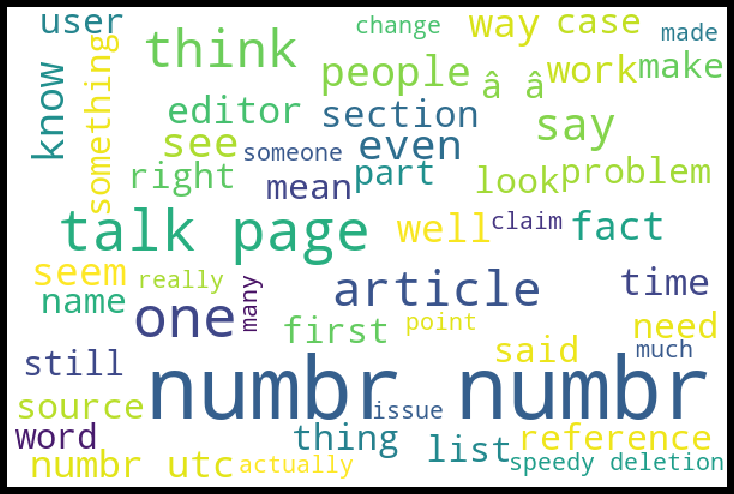

In [94]:
comments = train['comment_text'][train['malignant']==0]
comment_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(comment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(train['comment_text'])

X = features
y = train['malignant']

In [96]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9202867671019979


In [97]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36078
           1       0.98      0.17      0.29      3815

    accuracy                           0.92     39893
   macro avg       0.95      0.58      0.62     39893
weighted avg       0.93      0.92      0.89     39893



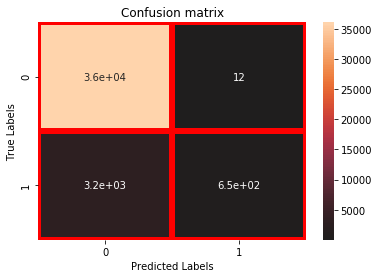

In [99]:
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [100]:
conf_mat

array([[36066,    12],
       [ 3168,   647]], dtype=int64)